# 问题1第2小问<br>
玻璃类型+表面风化的统计性规律

# 环境配置

In [71]:
import pandas as pd
import numpy as np
from scipy.stats import skew,kurtosis,probplot,spearmanr 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 数据导入和提取<br>
数据变换后，成分性数据，统一含量100%

In [54]:
path = 'merged_excel.xlsx'
data = pd.read_excel(path,sheet_name=1,)
data.columns

Index(['文物采样点', '文物编号', '二氧化硅(SiO2)', '氧化钠(Na2O)', '氧化钾(K2O)', '氧化钙(CaO)',
       '氧化镁(MgO)', '氧化铝(Al2O3)', '氧化铁(Fe2O3)', '氧化铜(CuO)', '氧化铅(PbO)',
       '氧化钡(BaO)', '五氧化二磷(P2O5)', '氧化锶(SrO)', '氧化锡(SnO2)', '二氧化硫(SO2)',
       '成分比例累加和', '表面风化', '类型', 'standard'],
      dtype='object')

In [55]:
data.head()

,文物采样点,文物编号,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2),成分比例累加和,表面风化,类型,standard
0,01,1,71.027559,0.0,10.234607,6.474746,0.891302,4.026227,1.782604,3.964758,0.000000,0.000000,1.198648,0.000000,0.0,0.399549,100.0,0,1,1.024485
1,02,2,36.319952,0.0,1.051156,2.342577,1.181299,5.736310,1.862048,0.260286,47.482230,0.000000,3.573931,0.190209,0.0,0.000000,100.0,1,0,1.001101
2,03部位1,3,87.050000,0.0,5.190000,2.010000,0.000000,4.060000,0.000000,0.780000,0.250000,0.000000,0.660000,0.000000,0.0,0.000000,100.0,0,1,1.000000
3,03部位2,3,62.408981,0.0,12.510113,5.936489,1.122573,5.562298,2.184466,5.147654,1.425971,2.892395,0.707929,0.101133,0.0,0.000000,100.0,0,1,1.011327
4,04,4,68.582136,0.0,10.066625,7.412034,1.623985,6.704143,2.144493,2.269415,0.000000,0.000000,0.822403,0.000000,0.0,0.374766,100.0,0,1,1.041016


In [56]:
# 提取铅钡无风化00，铅钡有风化01，高钾无风化10，高钾有风化11
bariumLead_non = data[(data['类型'] == 0) & (data['表面风化'] == 0)]
bariumLead = data[(data['类型'] == 0) & (data['表面风化'] == 1)]
highK_non = data[(data['类型'] == 1) & (data['表面风化'] == 0)]
highK = data[(data['类型'] == 1) & (data['表面风化'] == 1) ]
bariumLead_non.head()

,文物采样点,文物编号,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2),成分比例累加和,表面风化,类型,standard
20,20,20,42.257663,0.0,0.803077,0.000000,0.000000,6.164461,1.707952,5.406628,10.519172,26.637258,6.503789,0.000000,0.000000,0.0,100.0,0,0,1.131094
24,24,24,32.301780,0.0,0.000000,0.475324,0.000000,1.608010,0.000000,8.555825,29.470065,26.527104,0.141586,0.920307,0.000000,0.0,100.0,0,0,1.011327
31,30部位1,30,35.058703,0.0,1.439510,4.583971,1.000510,4.441041,2.164370,0.000000,40.040837,10.505360,0.000000,0.357325,0.408372,0.0,100.0,0,0,1.020929
32,30部位2,30,37.416413,0.0,0.000000,4.295846,0.516717,3.910841,2.776089,0.000000,38.237082,10.486322,1.428571,0.486322,0.445795,0.0,100.0,0,0,1.013171
33,31,31,66.961292,0.0,0.000000,1.625521,0.904196,3.159606,4.663212,0.447018,16.813979,3.474550,1.645840,0.304785,0.000000,0.0,100.0,0,0,1.015950


# 描述性统计规律<br>
均值，中位数，标准差，偏度系数，峰度系数，变异系数

In [57]:
columns = ['二氧化硅(SiO2)', '氧化钠(Na2O)', '氧化钾(K2O)', '氧化钙(CaO)',
       '氧化镁(MgO)', '氧化铝(Al2O3)', '氧化铁(Fe2O3)', '氧化铜(CuO)', '氧化铅(PbO)',
       '氧化钡(BaO)', '五氧化二磷(P2O5)', '氧化锶(SrO)', '氧化锡(SnO2)', '二氧化硫(SO2)']
indexs = ['mean','median','std','skewness','kurtosis','coefficient']
statistics_bariumLead_non = pd.DataFrame(index=indexs,columns=columns)
statistics_bariumLead = pd.DataFrame(index=indexs,columns=columns)
statistics_highK_non = pd.DataFrame(index=indexs,columns=columns)
statistics_highK = pd.DataFrame(index=indexs,columns=columns)

In [58]:
for column in columns:
    # 均值
    statistics_bariumLead_non.loc['mean',column] = bariumLead_non[column].mean()
    statistics_bariumLead.loc['mean',column] = bariumLead[column].mean()
    statistics_highK_non.loc['mean',column] = highK_non[column].mean()
    statistics_highK.loc['mean',column] = highK[column].mean()
    # 中位数
    statistics_bariumLead_non.loc['median',column] = bariumLead_non[column].median()
    statistics_bariumLead.loc['median',column] = bariumLead[column].median()
    statistics_highK_non.loc['median',column] = highK_non[column].median()
    statistics_highK.loc['median',column] = highK[column].median()
    # 标准差
    statistics_bariumLead_non.loc['std',column] = bariumLead_non[column].std()
    statistics_bariumLead.loc['std',column] = bariumLead[column].std()
    statistics_highK_non.loc['std',column] = highK_non[column].std()
    statistics_highK.loc['std',column] = highK[column].std()
    # 变异系数CV
    statistics_bariumLead_non.loc['coefficient',column] = bariumLead_non[column].std() / highK[column].mean()
    statistics_bariumLead.loc['coefficient',column] = bariumLead[column].std() / highK[column].mean()
    statistics_highK_non.loc['coefficient',column] = highK_non[column].std() / highK[column].mean()
    statistics_highK.loc['coefficient',column] = highK[column].std() / highK[column].mean()
    # 偏度系数
    statistics_bariumLead_non.loc['skewness',column] = skew(bariumLead_non[column])
    statistics_bariumLead.loc['skewness',column] = skew(bariumLead[column])
    statistics_highK_non.loc['skewness',column] = skew(highK_non[column])
    statistics_highK.loc['skewness',column] = skew(highK[column])
    # 峰度系数
    statistics_bariumLead_non.loc['kurtosis',column] = kurtosis(bariumLead_non[column]) + 3
    statistics_bariumLead.loc['kurtosis',column] = kurtosis(bariumLead[column]) + 3
    statistics_highK_non.loc['kurtosis',column] = kurtosis(highK_non[column]) + 3
    statistics_highK.loc['kurtosis',column] = kurtosis(highK[column]) + 3


C:\Users\Administrator\AppData\Local\Temp\ipykernel_15912\2982709452.py:18: RuntimeWarning: divide by zero encountered in scalar divide
  statistics_bariumLead_non.loc['coefficient',column] = bariumLead_non[column].std() / highK[column].mean()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_15912\2982709452.py:19: RuntimeWarning: divide by zero encountered in scalar divide
  statistics_bariumLead.loc['coefficient',column] = bariumLead[column].std() / highK[column].mean()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_15912\2982709452.py:20: RuntimeWarning: divide by zero encountered in scalar divide
  statistics_highK_non.loc['coefficient',column] = highK_non[column].std() / highK[column].mean()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_15912\2982709452.py:21: RuntimeWarning: invalid value encountered in scalar divide
  statistics_highK.loc['coefficient',column] = highK[column].std() / highK[column].mean()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_15912\298

In [59]:
statistics_bariumLead_non.to_csv('铅钡无风化描述性统计规律.txt',sep='\t')
statistics_bariumLead.to_csv('铅钡风化描述性统计规律.txt',sep='\t')
statistics_highK_non.to_csv('高钾无风化描述性统计规律.txt',sep='\t')
statistics_highK.to_csv('高钾风化描述性统计规律.txt',sep='\t')


# 正态性检验Q-Q图

In [66]:
def qqplot(data):
    fig, axes = plt.subplots(2, 7, figsize=(14, 6))  
    for i, col in enumerate(columns):  
        # 确定子图的位置  
        row = i // 7  
        col_idx = i % 7  
        ax = axes[row, col_idx]  
        probplot(data[col], dist="norm", plot=ax)  
        ax.set_title(f'Q-Q{col}')  
    # 调整子图布局  
    plt.tight_layout()  
    # 显示图形  
    plt.show()

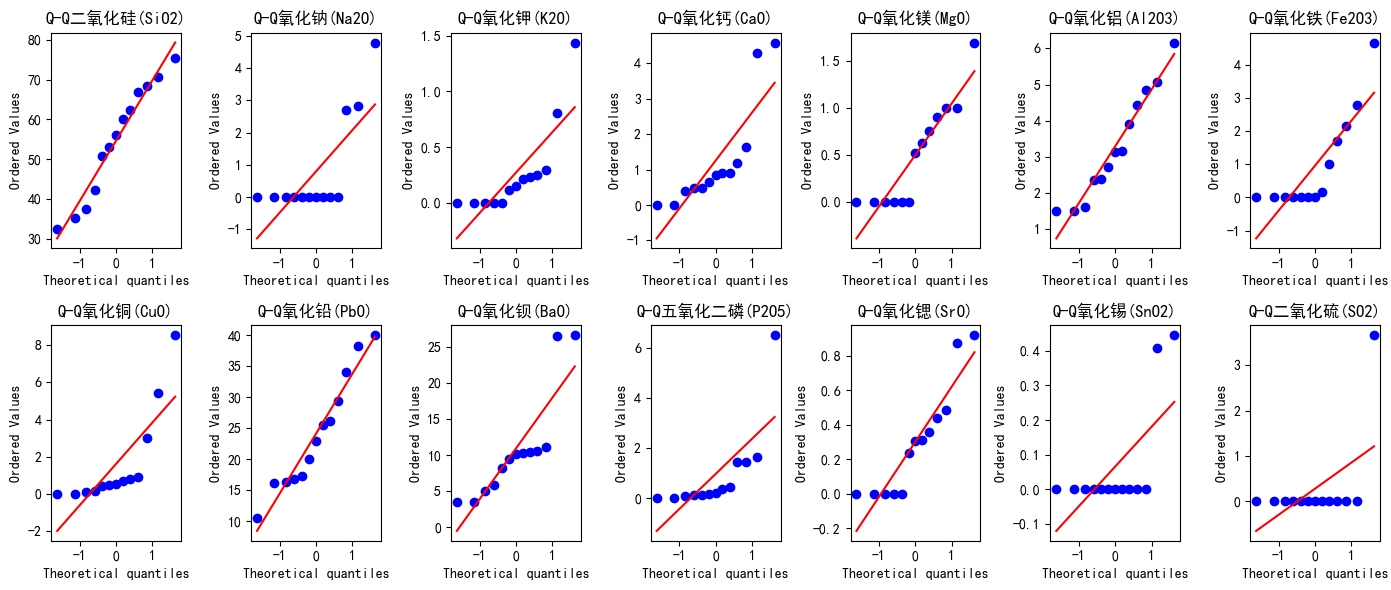

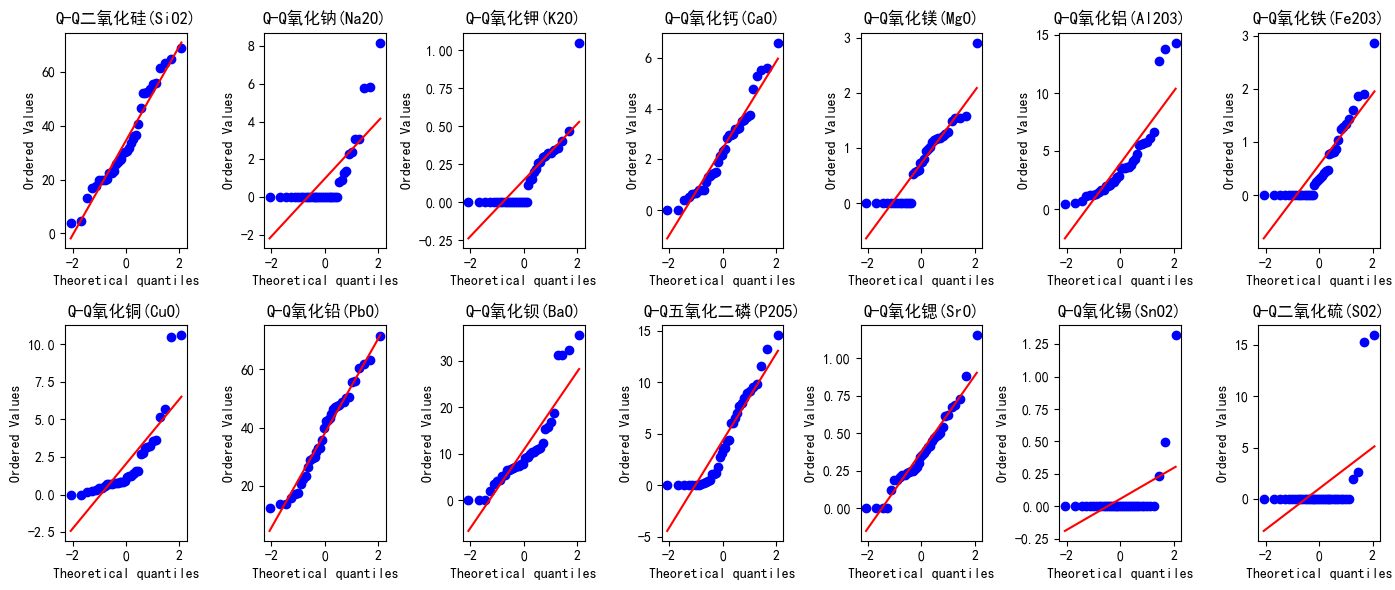

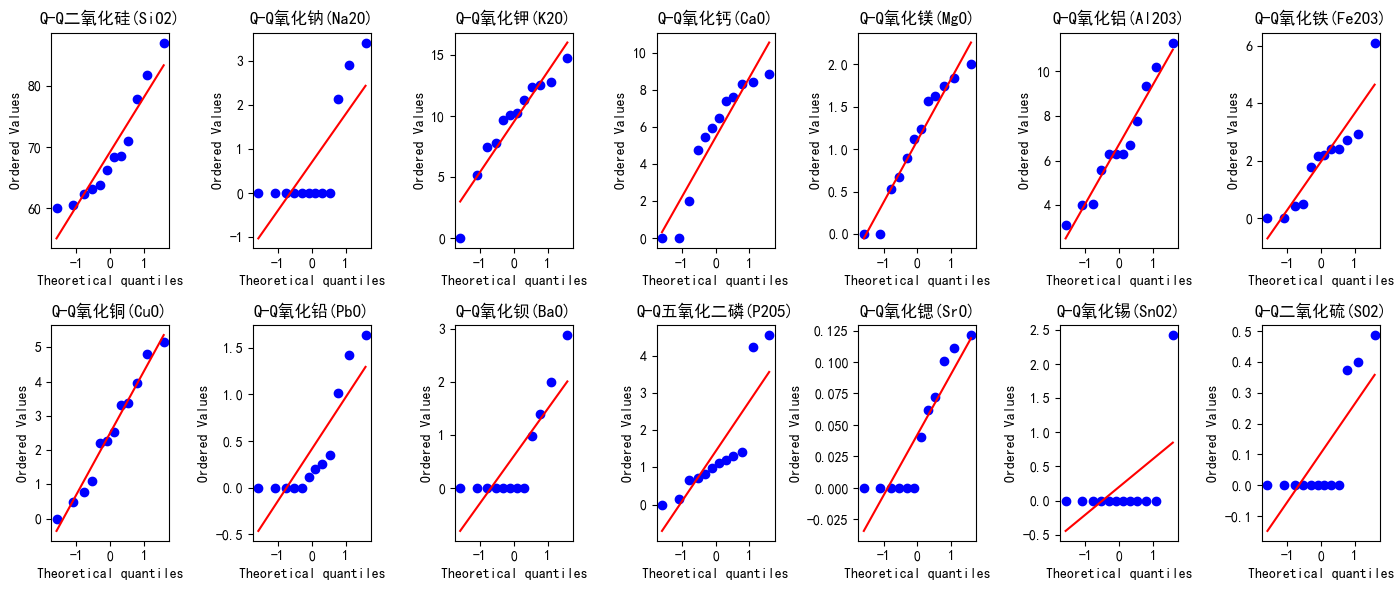

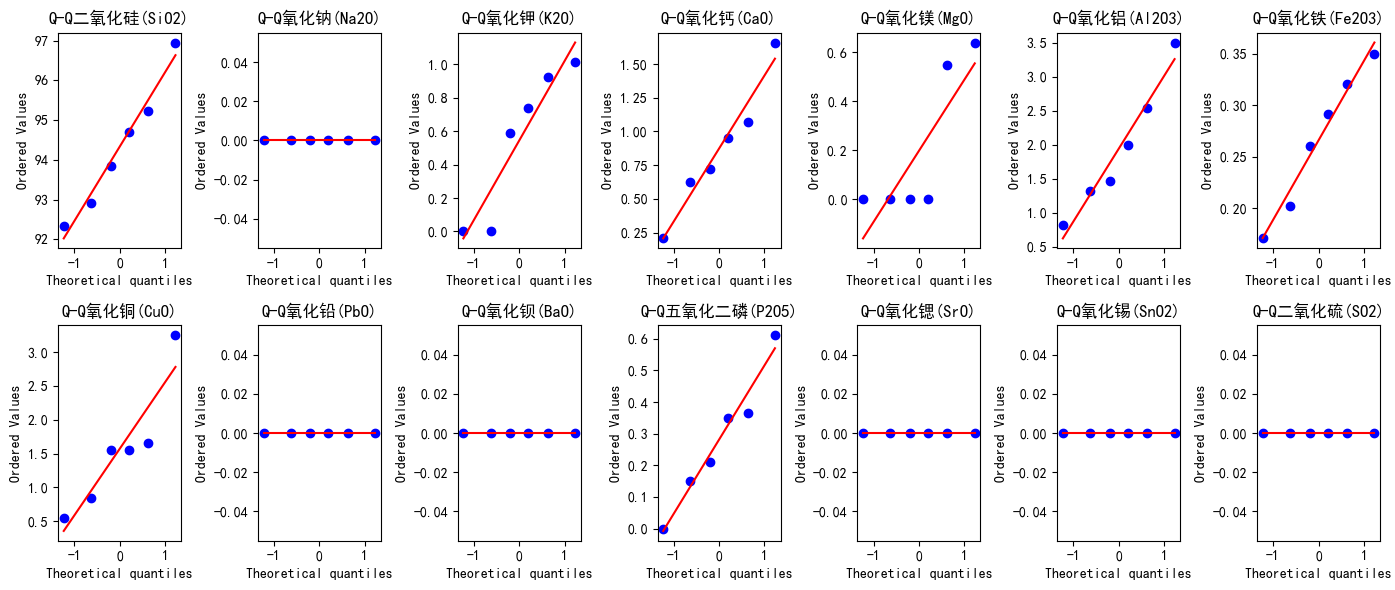

In [69]:
qqplot(bariumLead_non)
qqplot(bariumLead)
qqplot(highK_non)
qqplot(highK)

# 相关性分析<br>
由偏态系数和各特征qq图可知，一些特征并不服从正态分布，从而选择适用条件更广泛的斯皮尔曼秩相关系数，然后绘制热力图

In [81]:
def heatmap_corr_plot(data, feature , title):
       """
       绘制斯皮尔曼秩相关系数热力图
       Args:
              data: 原始数据
              feature: 特征
              tittle: 热力图名称
       """
       # 计算斯皮尔曼秩相关系数
       corr_matrix = data[feature].corr(method='spearman')
       # 绘制热力图  
       plt.figure(figsize=(10, 10))  # 设定图形大小  
       sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f") 
       # 旋转x轴标签
       plt.xticks(rotation=45, ha="right") 
       plt.title(f'{title}_斯皮尔曼秩相关系数_热力图')  
       plt.show()

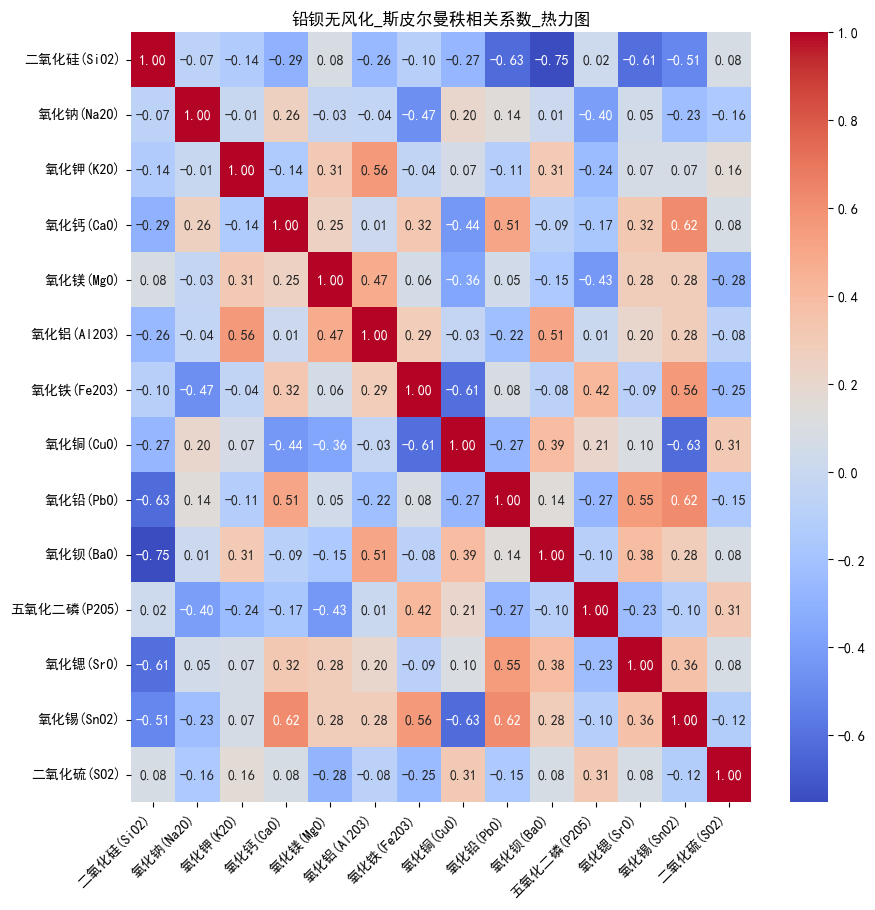

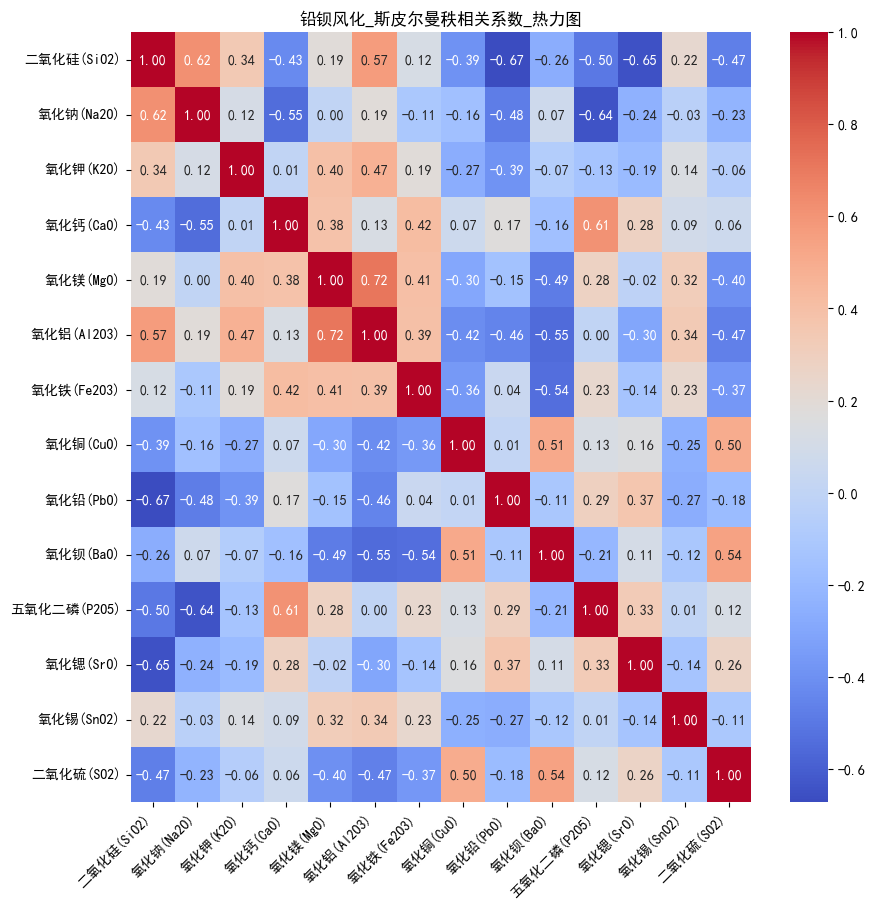

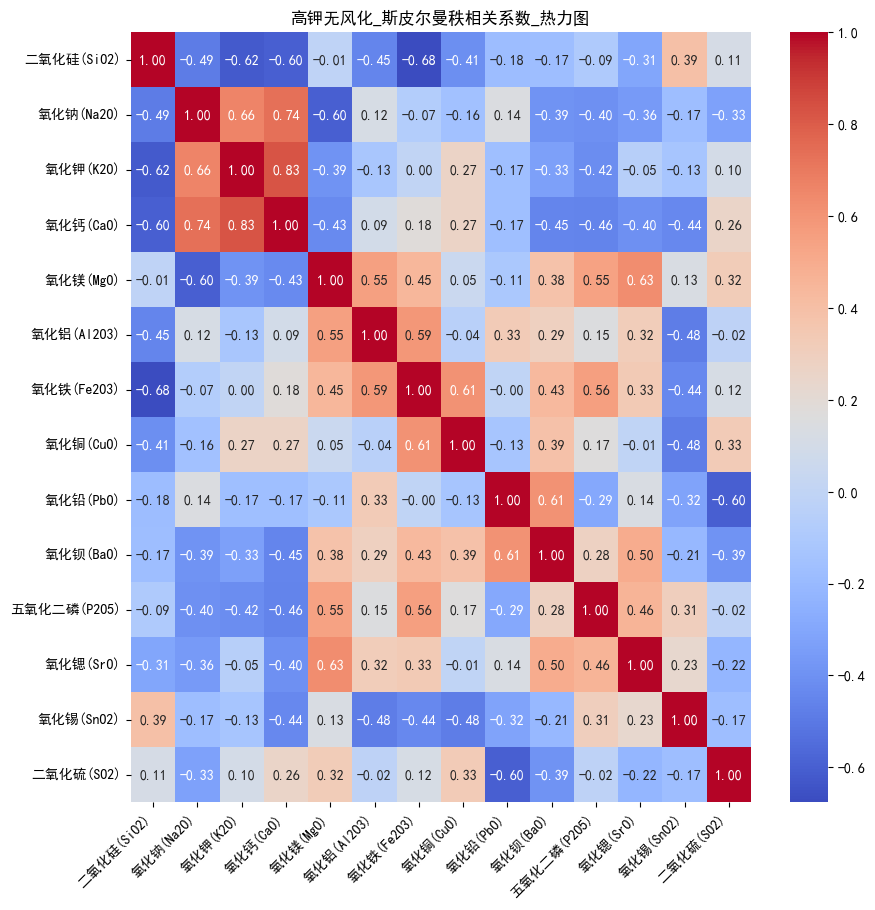

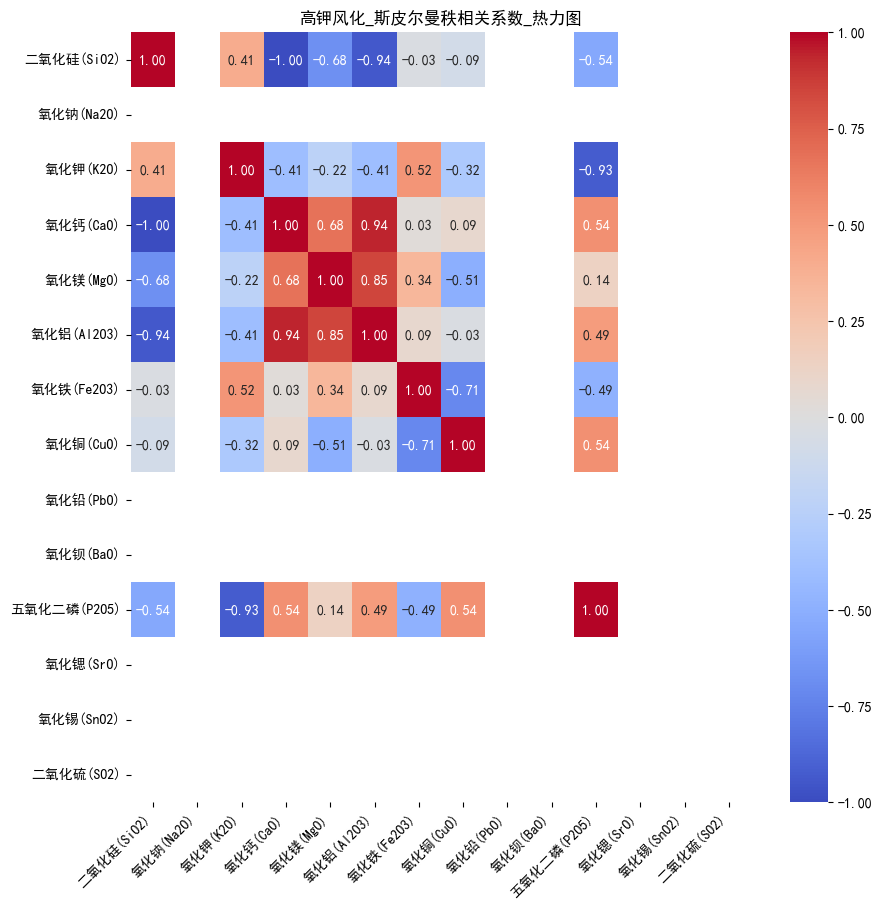

In [84]:
columns = ['二氧化硅(SiO2)', '氧化钠(Na2O)', '氧化钾(K2O)', '氧化钙(CaO)',
       '氧化镁(MgO)', '氧化铝(Al2O3)', '氧化铁(Fe2O3)', '氧化铜(CuO)', '氧化铅(PbO)',
       '氧化钡(BaO)', '五氧化二磷(P2O5)', '氧化锶(SrO)', '氧化锡(SnO2)', '二氧化硫(SO2)']
heatmap_corr_plot(bariumLead_non,columns,'铅钡无风化')
heatmap_corr_plot(bariumLead,columns,'铅钡风化')
heatmap_corr_plot(highK_non,columns,'高钾无风化')
heatmap_corr_plot(highK,columns,'高钾风化')
